In [75]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, leastsq

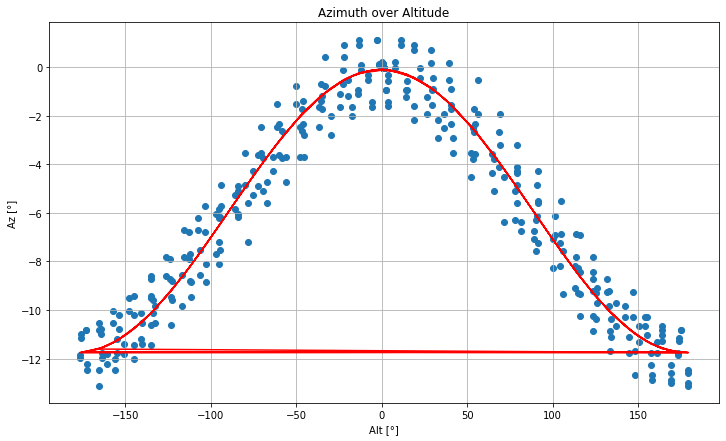

In [82]:
data = np.genfromtxt('data3.csv', delimiter=",")
x,y = data.T
e, d, c, b, a = np.polyfit(x, y, deg=4)

xseq = np.linspace(-180, 180, num=100)


guess_mean = np.mean(y)
guess_std = 3*np.std(y)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 0.02
guess_amp = 1

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda _x: _x[0]*np.sin(_x[1]*x+_x[2]) + _x[3] - y
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*x+est_phase) + est_mean


fig, ax = plt.subplots(figsize=(12, 7))  # a figure with a single Axes
ax.scatter(x,y);
# Plot regression line
#ax.plot(xseq, a + b * xseq + c * xseq**2 + d * xseq**3 + e * xseq**4, color="k", lw=2.5);
ax.plot(x, data_fit, color="red")

ax.set_xlabel('Alt [°]')
ax.set_ylabel('Az [°]');
ax.set_title("Azimuth over Altitude")
ax.grid(True);